In [1]:
import numpy as np

# This is the same toy function used in the example of backprop in understanding deep learning
def teaching_function(beta: np.ndarray, omega: np.ndarray):
    def fn_x_only(x):
        return beta[3] + omega[3] * np.cos(
            beta[2] + omega[2] * np.exp(
                beta[1] + omega[1] * np.sin(
                    beta[0] + omega[0] * x
                )
            )
        )
    return fn_x_only

def create_dataset(size:int, fn):
    x = np.linspace(-5, 5, size)
    y_clean = fn(x)
    y_noisy = y_clean + np.random.normal(0, 0.1, size=x.shape)  # add small noise

    return x.reshape((1,size)), y_noisy.reshape((1,size))

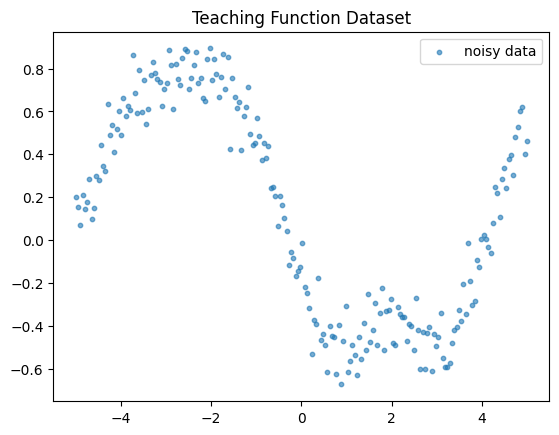

In [38]:
import matplotlib.pyplot as plt

np.random.seed(42)

beta = np.random.uniform(-1, 1, size=4)
omega = np.random.uniform(-1, 1, size=4)
x,y_noisy = create_dataset(200,teaching_function(beta,omega))
#x,y_noisy = create_dataset(200,lambda x: -x+1)

plt.scatter(x, y_noisy, s=10, alpha=0.6, label="noisy data")
plt.legend()
plt.title("Teaching Function Dataset")
plt.show()

In [47]:
from rafael_nn import Linear, MeanSquaredError, NeuralNetwork, GradientDescent
np.random.seed(0)

def print_weights(nn):
    for layer in nn.layers:
        print(layer)
        print("weight",layer.weights)
        print("bias",layer.biases,"\n")

n_layers = 3
n_by_layer = 15
layers= [Linear(1,n_by_layer)] + [Linear(n_by_layer,n_by_layer) for _ in range(n_layers-1)] + [Linear(n_by_layer,1)]

loss_fn = MeanSquaredError()
nn = NeuralNetwork(layers, optimizer=GradientDescent(0.01), loss_fn=loss_fn)


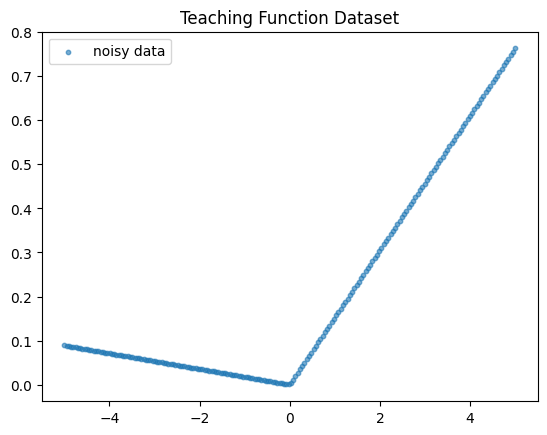

In [48]:
y_pred = nn(x)

plt.scatter(x, y_pred, s=10, alpha=0.6, label="noisy data")
plt.legend()
plt.title("Teaching Function Dataset")
plt.show()

In [49]:
permutation = np.random.permutation(len(x))
x_shuffled = x[permutation]
y_shuffled = y_noisy[permutation]

#print("PREV")
#print_weights(nn)
nn.train(x,y_noisy)
#print("POST")
print_weights(nn)

ERROR: 0.38943144668737717
ERROR: 0.38374455434992677
ERROR: 0.33625202765288514
ERROR: 0.26608260176261816
ERROR: 0.262147130844325
ERROR: 0.21446218727272467
ERROR: 0.2264650231528308
ERROR: 0.19283447703445064
ERROR: 0.20374414175518937
ERROR: 0.18098870203272518
ERROR: 0.19054356391738544
ERROR: 0.17253237285549333
ERROR: 0.18169096019454653
ERROR: 0.16642847167541455
ERROR: 0.17586584241031594
ERROR: 0.16152228963098872
ERROR: 0.17106283449094392
ERROR: 0.15650183497863565
ERROR: 0.1655741310417817
ERROR: 0.15022259667771298
ERROR: 0.16414880464749187
ERROR: 0.14785354187748967
ERROR: 0.16292360926382177
ERROR: 0.14695224758821676
ERROR: 0.16216416698610486
ERROR: 0.1462194950590232
ERROR: 0.16265881172219776
ERROR: 0.14504650326843177
ERROR: 0.15880995229407346
ERROR: 0.14106825290553765
ERROR: 0.15205646398259695
ERROR: 0.1352276690566971
ERROR: 0.14288565525440583
ERROR: 0.12777392038095337
ERROR: 0.13350609804991773
ERROR: 0.12078419562697798
ERROR: 0.12608714441931085
ERROR: 

[[0.11960339]]


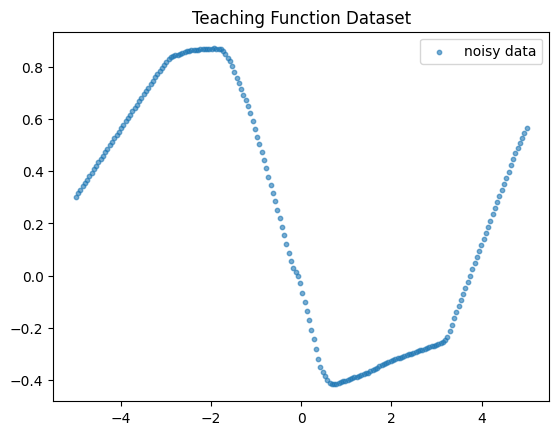

In [50]:
y_pred = nn(x)
print(nn(np.array([[4]])))

plt.scatter(x, y_pred, s=10, alpha=0.6, label="noisy data")
plt.legend()
plt.title("Teaching Function Dataset")
plt.show()